In [1]:
from localgraphclustering import *
import time
import numpy as np

In [2]:
g = graph_class_local.GraphLocal('JohnsHopkins.edgelist','edgelist','\t')

The following nodes have no outgoing edges: [ 699  976  981 1280 1415 1543 1664 2020 2355 2652 2862 2916 3397 3516 3831
 3970 4118 4601 4615 4809 4828 4881 4946] 

These nodes are stored in the your_graph_object.dangling.
To avoid numerical difficulties we connect each dangling node to another randomly chosen node.


In [3]:
pr = approximate_PageRank.Approximate_PageRank()
pr_fast = approximate_PageRank_fast.Approximate_PageRank_fast()
pr_weighted_fast = approximate_PageRank_weighted_fast.Approximate_PageRank_weighted_fast()
l1reg = l1_regularized_PageRank.L1_regularized_PageRank()
l1reg_fast = l1_regularized_PageRank_fast.L1_regularized_PageRank_fast()
pr_nb = pageRank_nibble.PageRank_nibble()
sc = sweepCut_general.SweepCut_general()
sc_fast = sweepCut_fast.SweepCut_fast()
sc_normalized = sweepCut_normalized.SweepCut_normalized()
mc = multiclass_label_prediction.Multiclass_label_prediction()
sp = spectral_partitioning.Spectral_partitioning()
MQI_fast = MQI_fast.MQI_fast()
ds_fast = densest_subgraph_fast.densest_subgraph_fast()

In [5]:
output_l1reg_fast = l1reg_fast.produce([g],[0],ys=[[0.0]*g._num_vertices])

In [6]:
output_pr = pr.produce([g],[0])
output_pr_fast = pr_fast.produce([g],[0])
output_pr_weighted_fast = pr_fast.produce([g],[0])
output_l1reg = l1reg.produce([g],[0])
output_pr_nb = pr_nb.produce([g],[0])
output_sp = sp.produce([g])

In [7]:
output_sc = sc.produce([g],p=output_l1reg_fast[0])
output_sc_fast = sc_fast.produce([g],p=output_l1reg_fast[0])
output_sc_normalized = sc_normalized.produce([g],p=output_l1reg_fast[0])

In [8]:
# List of nodes around which we want to find labels
labels = [[1,10,300],[3215],[1002,2500,540]]

# This function predicts labels for unlabelled nodes. For details refer to:
# D. Gleich and M. Mahoney. Variational 
# Using Local Spectral Methods to Robustify Graph-Based Learning Algorithms. SIGKDD 2015.
# https://www.stat.berkeley.edu/~mmahoney/pubs/robustifying-kdd15.pdf
# To check to documentation for the input and output of this function call 
# help(multiclass_label_prediction)
output_mc = mc.produce([g],labels=labels)

In [9]:
g = graph_class_local.GraphLocal('minnesota.edgelist','edgelist',' ')

In [10]:
# The initial cut we want to improve
R = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]

output_MQI_fast = MQI_fast.produce([g],[R])

In [10]:
g = graph_class_local.GraphLocal('Erdos02-cc.edgelist','edgelist',' ')

In [11]:
output_ds_fast = ds_fast.produce([g])

AttributeError: dlsym(0x7fe5f8de93c0, densest_subgraph64): symbol not found

There are  1  connected components in the graph
# of calls to FISTA: 9516
NCP plots for component: 0


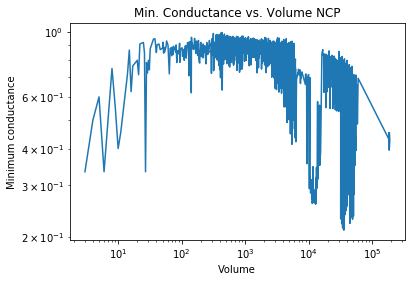

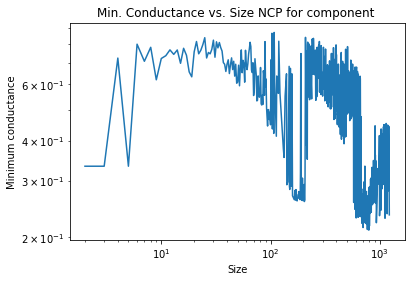

In [7]:
ncp_instance = ncp.Ncp()
output_ncp = ncp_instance.produce([g],1,timeout_ncp = 1000)